In [381]:
%config IPCompleter.greedy = True
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.naive_bayes import GaussianNB

pd.set_option('mode.chained_assignment', None)
sb.set(rc={'figure.figsize':(9,9)})
sb.set(font_scale=1.4)

number of mislabeled points out of a total 30 points : 0
Testing Accuracy:100%

Confusion Matrix:
[[15  0]
 [ 0 15]]


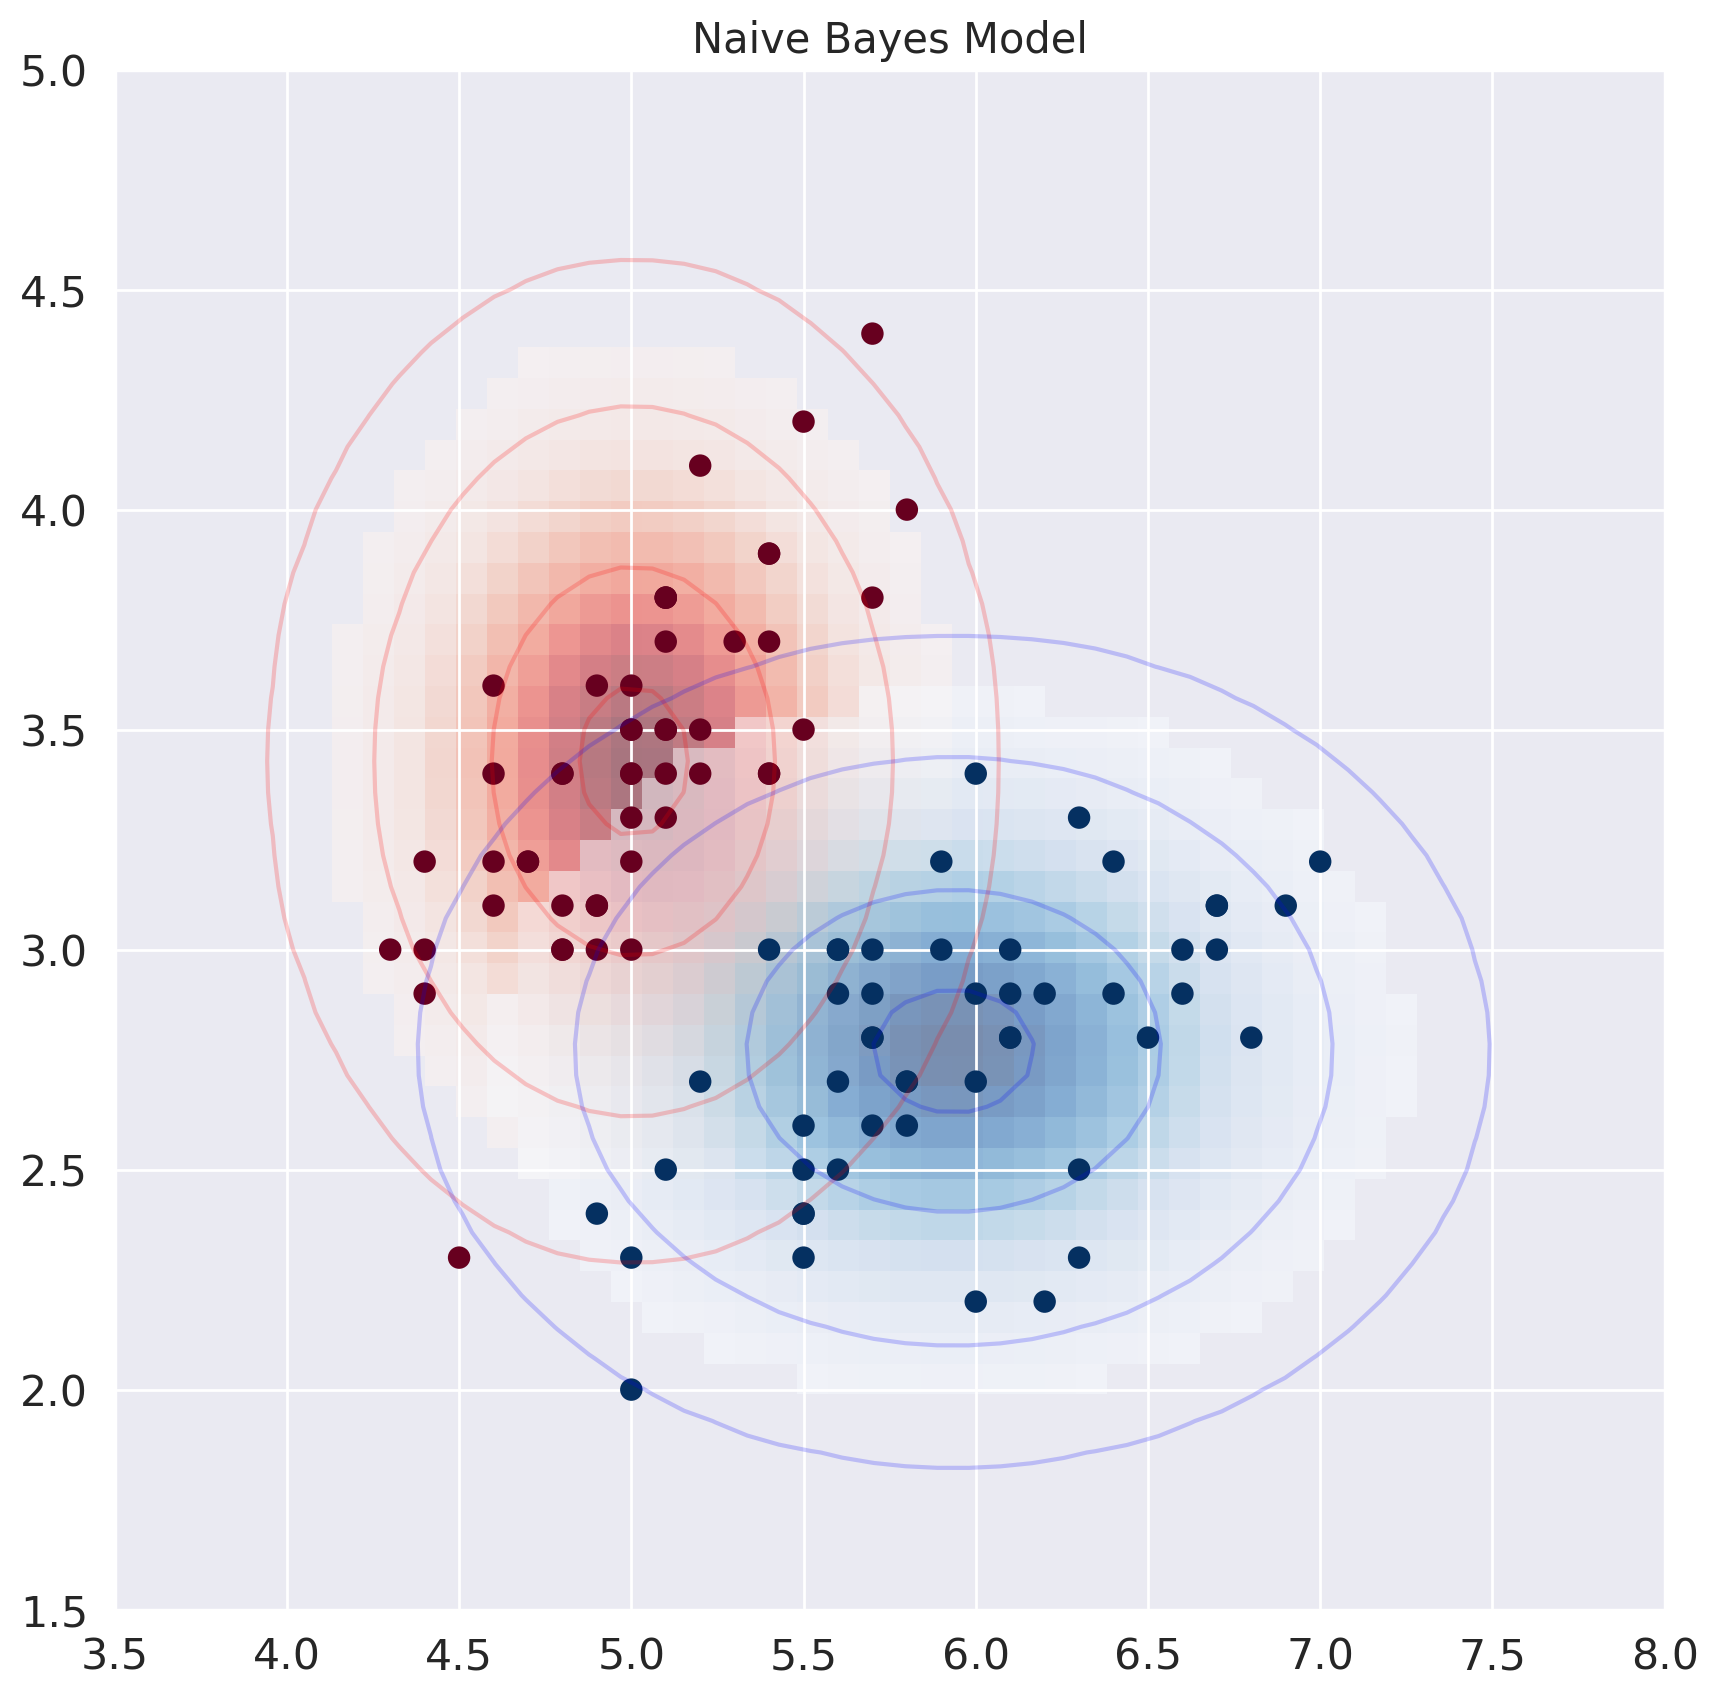

In [401]:
x,y=load_iris(return_X_y=True)
#iris=load_iris()
#x=iris.data
#y=iris.target

x_i=x[:,:2][y<=1]
y_i=y[y<=1]

x=np.array(x_i)
y=np.array(y_i)

x_train,x_test,y_train,y_test=train_test_split(x_i,y_i,test_size=.3,random_state=0)
gnb=GaussianNB()
y_pred=gnb.fit(x_train,y_train).predict(x_test)

print('number of mislabeled points out of a total {} points : {}'.format
      (y_test.shape[0],(y_test!=y_pred).sum()))

#plotting helper function
fig,ax=plt.subplots(figsize=(10, 10))
ax.scatter(x[:,0],x[:,1],c=y,s=50,cmap='RdBu')
ax.set_title('Naive Bayes Model',fontsize=15)

xlim=(3.5,8)
ylim=(1.5,5)
#xlim=(x[:,0].min(),x[:,0].max())
#ylom=(x[:,1].min(),x[:,1].max())

xg=np.linspace(xlim[0] , xlim[1] , 50)
yg=np.linspace(ylim[0] , ylim[1] ,50)
xx,yy=np.meshgrid(xg , yg)
xgrid=np.vstack([xx.ravel(),yy.ravel()]).T
    
for label,color in enumerate(['red','blue']):
    mask=(y==label)
    mu=x[mask].mean(0)
    std=x[mask].std(0)
    norm=xgrid-mu
    p=np.exp(-.5 * norm ** 2 / std ** 2).prod(1)
    pm=np.ma.masked_array(p, p < 0.03)
    
    ax.pcolorfast(xg, yg, pm.reshape(xx.shape), alpha=0.5,cmap=color.title() + 's')
    ax.contour(xx, yy, p.reshape(xx.shape), levels=[.01,.1,.5,.9], colors=color, alpha=0.2)
    
ax.set(xlim=xlim, ylim=ylim)

    
print('Testing Accuracy:{:.0f}%'.format(100*accuracy_score(y_test,y_pred)))
print('\nConfusion Matrix:\n{}'.format(confusion_matrix(y_test,y_pred)))

In [325]:
x.shape

(100, 2)

In [327]:
y.shape

(100,)

In [73]:
pd.DataFrame(y_pred).value_counts()

0
0    30
1    20
Name: count, dtype: int64

In [74]:
gnb.class_count_

array([20., 30.])

In [75]:
gnb.classes_

array([0, 1])

In [76]:
y_test.shape[0]

50

In [77]:
5!=4

True

In [78]:
y_test!=y_pred

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [79]:
(y_test!=y_pred).sum()

0

In [111]:
x[:,0].min()

4.3

In [112]:
x[:,0].max()

7.9

In [113]:
x[:,1].min()

2.0

In [114]:
x[:,1].max()

4.4

In [320]:
xx.shape

(50, 50)

In [119]:
yy.shape

(50, 50)

In [129]:
[xx.ravel(),yy.ravel()]

[array([4.3       , 4.37346939, 4.44693878, ..., 7.75306122, 7.82653061,
        7.9       ]),
 array([2. , 2. , 2. , ..., 4.4, 4.4, 4.4])]

In [140]:
xgrid.shape

(2500, 2)

In [134]:
xx.ravel().shape

(2500,)

In [144]:
y==0

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [149]:
x[y==0].shape

(50, 4)

In [196]:
x[y==0].mean(0)

array([5.006, 3.428, 1.462, 0.246])

In [157]:
x[y==0].std(0)

array([0.34894699, 0.37525458, 0.17191859, 0.10432641])

In [163]:
xgrid-2

array([[2.3       , 0.        ],
       [2.37346939, 0.        ],
       [2.44693878, 0.        ],
       ...,
       [5.75306122, 2.4       ],
       [5.82653061, 2.4       ],
       [5.9       , 2.4       ]])

In [170]:
np.exp(10) #calculates e^x

22026.465794806718

In [172]:
np.e #euler's number


2.718281828459045

In [177]:
np.prod([2,4,5])

40

In [212]:
np.array([2,4,5]).prod()

40

In [181]:
2**10

1024

In [193]:
xgrid.shape

(2, 2500)

In [192]:
mu.shape

(4,)

In [226]:
p.shape

(2500,)

In [203]:
norm.shape

(2500, 2)

In [232]:
ax

<Axes: title={'center': 'Naive Bayes Model'}>

In [237]:
color

'blue'

In [240]:
color.title()+'s'

'Blues'

In [400]:
from sklearn.naive_bayes import MultinomialNB

x,y=load_iris(return_X_y=True)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=0)
clf=MultinomialNB()
y_pred=clf.fit(x_train,y_train).predict(x_test)

print('Testing Accuracy:{:.0f}%'.format(accuracy_score( y_test,y_pred)*100))
print('\nConfusion Matrix:\n{}'.format(confusion_matrix(y_test,y_pred)))

Testing Accuracy:60%

Confusion Matrix:
[[16  0  0]
 [ 0  0 18]
 [ 0  0 11]]


In [398]:
from sklearn.naive_bayes import ComplementNB

x,y=load_iris(return_X_y=True)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=0)
clf=ComplementNB()
y_pred=clf.fit(x_train,y_train).predict(x_test)

print('Testing Accuracy:{:.0f}%'.format(accuracy_score( y_test,y_pred)*100))
print('\nConfusion Matrix:\n{}'.format(confusion_matrix(y_test,y_pred)))

Testing Accuracy:60%

Confusion Matrix:
[[16  0  0]
 [ 0  0 18]
 [ 0  0 11]]


In [402]:
from sklearn.naive_bayes import BernoulliNB

x,y=load_iris(return_X_y=True)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.5,random_state=0)
clf=BernoulliNB()
y_pred=clf.fit(x_train,y_train).predict(x_test)

print('Testing Accuracy:{}%'.format(accuracy_score( y_test,y_pred)*100))
print('\nConfusion Matrix:\n{}'.format(confusion_matrix(y_test,y_pred)))

Testing Accuracy:28.000000000000004%

Confusion Matrix:
[[21  0  0]
 [30  0  0]
 [24  0  0]]
